In [1]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
parentdir = os.path.abspath("..")
from astropy.table import Table

plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.3)
plt.rc('figure.subplot', hspace=0.3)
plt.rc('legend', fancybox=True, borderaxespad=0.)



# Plots to be saved at
plot_path = parentdir + '/plots/'


/nfs/slac/g/ki/ki19/jmeyers3/miniconda2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Previously measured value at default galaxy parameters

# m_cg of refernce galaxy with default parametrs at z=0.3
val = 0.0010296112461116722

# Sigma of weight function with adaptive moments computed by HSM for reference galaxy at z=0.3 (pixels)
hsm_sig = 2.9932687282562256    #(hsm_hlr = 0.5073336827552926 arcsec)


# HLR of galaxy comupted by galsim.calculateHLR() at z=0.3 (arcesc)
hlr = 0.94868329805051388

# m_cg of refernce galaxy with default parametrs at z=0.3 with KSB with weight size matched to galaxy hlr
val2 = 0.00051930546760576418





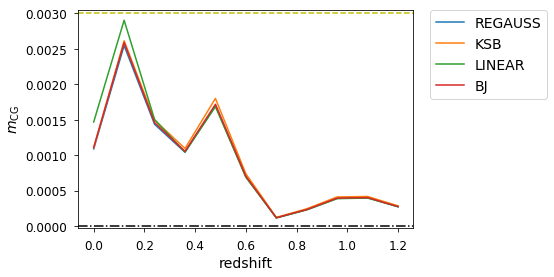

In [6]:
methods = ['REGAUSS', 'KSB', 'LINEAR', 'BJ']
cat={}

for method in methods:
    name =parentdir + '/results/ref_gal_cg_bias_{0}_r_band.fits'.format(method)
    cat[method] = Table.read(name, format='fits')

for method in methods:
    plt.plot(cat[method]['redshift'], cat[method]['para_m1'].T[2], label=method)
plt.xlabel('redshift')
plt.ylabel(r'$m_{\rm CG}$')
plt.axhline(0, linestyle= '-.', c='k')
plt.axhline(0.003, linestyle= '--', c='y')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.savefig(plot_path + "ref_gal_all_hsm.png", 
             bbox_inches='tight')


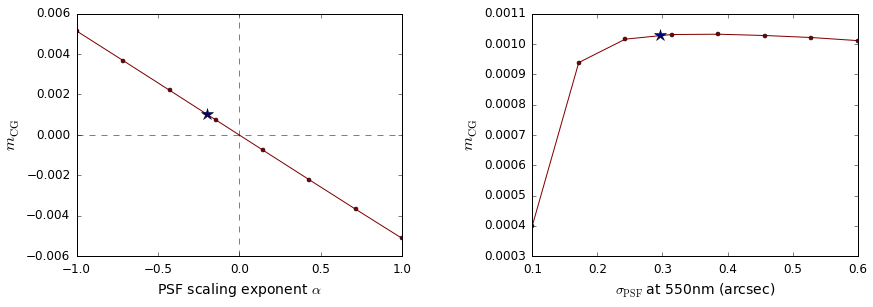

In [3]:
fig = plt.figure(0,figsize=[14,10])
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.3)
plt.subplot(2,2,1)
cat = Table.read(parentdir + '/results/ref_gal_cg_bias_var_alpha_r_band.fits', format='fits')
plt.plot(cat['alpha'], cat['para_m1'].T[2],markersize=4,
             marker='o', label='Parametric', color='maroon')
plt.xlabel(r'PSF scaling exponent $\alpha$')
plt.ylabel(r'$m_{\rm CG}$', size=16)
# plt.title('CG bias depenedence on LSST PSF alpha')
plt.axhline(0, c='k', linestyle='--', alpha=0.5)
plt.axvline(0, c='k', linestyle='--', alpha=0.5)
plt.plot([-0.2], [val], '*',
         c='navy', markersize=12)


plt.subplot(2,2,2)
cat = Table.read(parentdir + '/results/ref_gal_cg_bias_var_psig_r_band.fits', format='fits')
plt.plot(cat['psf_sigma'], cat['para_m1'].T[2],markersize=4,
             marker='o', label='Parametric', color='maroon')
plt.xlabel(r'$\sigma_{\rm PSF}$ at 550nm (arcsec)')
plt.ylabel(r'$m_{\rm CG}$', size=16)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('CG bias depenedence on LSST PSF size')
plt.plot([0.297], [val], '*',
         c='navy', markersize=12)
plt.savefig(plot_path + "ref_gal_psf_cg.png", 
             bbox_inches='tight')

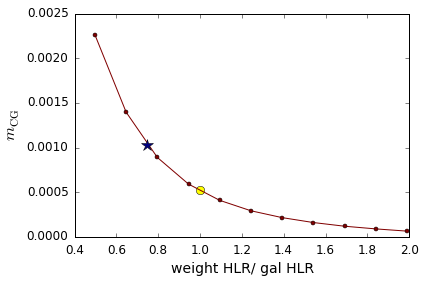

In [4]:
name =parentdir + '/results/ref_gal_cg_bias_var_weight_r_band.fits'
cat = Table.read(name, format='fits')

x2 = 1
val2 = 0.00051930546760576418
plt.plot([x2], [val2], 'o',
         color='yellow', markersize=8)

xp = cat['weight_sigma']*1.18 / 0.949
fp = cat['para_m1'].T[2]
plt.plot( xp, fp,
         '-', marker='o', markersize=4, 
         label='Parametric', color='maroon')
plt.xlabel('weight HLR/ gal HLR')
plt.ylabel(r'$m_{\rm CG}$', size=16)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('CG bias depenedence on weight function size')

hsm_sig = 2.9932687282562256*0.2
x = hsm_sig*1.18/ 0.949

plt.plot([x], [val], '*',
         c='navy', markersize=12)


plt.savefig(plot_path + "ref_gal_weight.png", bbox_inches='tight')

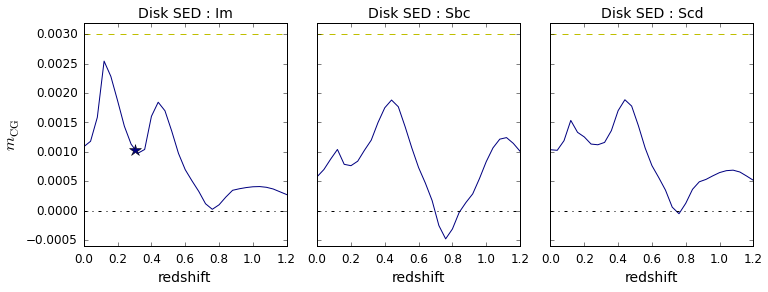

In [5]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat = {}
for dSED in dSEDs :
    path = parentdir + '/results/'
    name = path + 'ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat[dSED] = Table.read(name,format='fits')

fig, ax = plt.subplots(1, len(dSED), sharey=True, figsize=[12,4])
fig.subplots_adjust(wspace = 0.15)
fig.subplots_adjust(hspace = 0.15)


for i,dSED in enumerate(dSEDs) :

    redshifts = cat[dSED]['redshift']
    ax[i].plot(redshifts, cat[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    ax[i].axhline(0, linestyle= '-.', c='k')
    ax[i].axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    ax[i].set_xlabel('redshift', size=14)
    
    ax[i].set_title("Disk SED : %s"%dSED, size=14)
    ax[i].set_ylim([-0.0006, 0.0032])
ax[0].set_ylabel(r'$m_{\rm CG}$', size=16)
ax[0].plot([0.3], [val], '*',
           c='navy', markersize=12)
plt.savefig(plot_path + "ref_gal_diff_sed.png", 
             bbox_inches='tight')




In [11]:
from matplotlib import ticker
def plot_calibnew(gcg,gnocg,gtrue):
    ### To be verified
    """Justify definition of mcg 
    Plots measured shape of galaxy with CG, galaxy with no CG and CG bias.
    Show the linearity of observed shape and true shape, with the slope giving 
    the bias. 
    @param gcg      Measured shape of galaxy with CG
    @param gnocg    Measured shape of galaxy with no CG
    @param gtrue    True shape of galaxy (the applied shear)
    @param Args     Class containing parameters 
    """
    fit_cg = np.polyfit(gtrue, gcg,1)
    fit_nocg = np.polyfit(gtrue, gnocg,1)
    fit_fin = np.polyfit(gtrue, gcg - gnocg, 1)
    g_exp_cg = gtrue*fit_cg[0] + fit_cg[1]
    g_exp_nocg= gtrue*fit_nocg[0] + fit_cg[1]
    g_exp_fin = gtrue*fit_fin [0] + fit_fin[1]
    chis_cg = g_exp_cg - gcg
    chis_nocg = g_exp_nocg - gnocg
    chis_fin = g_exp_fin - (gcg - gnocg)
    
    plt.figure(figsize=[18,20])
    plt.subplots_adjust(hspace=0.001) 
    plt.subplots_adjust(wspace = 0.4)
    #plt.suptitle(" \n  ")
    #Plot1
    ax1 = plt.subplot2grid((4,3), (0,0), rowspan=2)
    ax1.text(0.0051,0.0098,'$\hat{g}_{ \\rm CG}=(1+m_o + m_{\\rm CG})g+ (c_o + c_{\\rm CG})$ \n $m_o + m_{\\rm CG} = 1.26 \\times 10^{-2}$ \n $c_o + c_{\\rm CG} = -1.48 \\times 10^{-7}$ ',
             fontsize=14, bbox=dict(facecolor='red', alpha=0.3))
    #ax1.text(0.0055,0.0098,'$m_o + m_{\\rm CG} = 1.26 \\times 10^{-2} $', fontsize=14)
    #ax1.text(0.0055,0.0096,'$c_o + c_{\\rm CG} = -1.48 \\times 10^{-7}$', fontsize=14)
    ax1.plot(gtrue, gcg, marker='o',
             label='Measured', markersize=10)
    ax1.plot(gtrue, g_exp_cg, linewidth=2.5)
    ax1.set_ylabel(r'$\hat{g}_{\rm CG}$',
                   size=18)
    #ax1.set_title('$\\rm g^{obs}_{CG}=g^{true}(1+m_o+m_{CG})+(c_o+c_{CG})$ \n $\\rm g^{obs}_{CG}=g^{true}'+'(1+{0:.2E})+{1:.2E}$'.format(fit_cg[0]-1,fit_cg[1]),
    #              size=18, y=1.04, x = 0.15)
    #ax1.yaxis.set_ticks(np.arange(0.005,0.012,0.001)) 
    ax1.set_ylim([0.0048,0.0105])
    ax2 = plt.subplot2grid((4,3), (2,0), sharex=ax1)
    y3 = gcg - gtrue
    ax2.plot(gtrue, y3, 'o')
    #ax2.set_ylabel(r'$\rm g^{obs}_{CG}-g^{true}$ ($\times 10^{-4}$)',size=18)
    ax2.set_ylabel(r'$\hat{g}_{\rm CG}-g$ $(\times 10^{-4})$',size=18)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e4)))
    ax2.set_ylim([0.000054,0.00013])
    #ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax3 = plt.subplot2grid((4,3), (3,0), sharex=ax1 )
    ax3.plot(gtrue, chis_cg, linewidth=2.5)
    ax3.set_ylabel(r'Residual $(\times 10^{-8})$',size=16)
    ax3.axhline(y=0.,linewidth=2, color = 'k',linestyle='--')
    ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e8)))
    #ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax3.set_xlabel(r'$g$',size=18)    
    ax3.set_xlim([0.005,0.01])
    #ax3.xaxis.set_ticks(np.arange(0.005,0.01,0.001))
    #ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    #Plot2
    ax4 = plt.subplot2grid((4,3), (0,1), rowspan=2)
    ax4.text(0.0051,0.0098,'$\hat{g}_{ \\rm no \, CG}=(1+m_o)g+ (c_o)$ \n $m_o = 1.16 \\times 10^{-2} $ \n $c_o = -1.63 \\times 10^{-7}$ ',
             fontsize=14, bbox=dict(facecolor='red', alpha=0.3))
    #ax4.text(0.0055,0.0098,'$m_o = 1.16 \\times 10^{-2} $', fontsize=14)
    #ax4.text(0.0055,0.0096,'$c_o = -1.63 \\times 10^{-7}$', fontsize=14)
    ax4.plot(gtrue, gnocg,'o',markersize=10)
    ax4.plot(gtrue,g_exp_nocg, linewidth=2.5)
    ax4.set_ylabel(r'$\hat{g}_{\rm no \, CG}$',size=18)
    #ax4.yaxis.set_ticks(np.arange(0.001,0.010,0.001))
    ax4.set_ylim([0.0048,0.0105])
    #ax4.set_title('$\hat{g}_{noCG}=g(1+m_o)+c_o$ \n $\\rm g^{obs}=g^{true}'+'(1+{0:.2E})+{1:.2E}$'.format(fit_nocg[0]-1,fit_nocg[1]),
    #             size=18, y=1.04, x = 0.45)
    plt.setp(ax4.get_xticklabels(), visible=False)
    ax5 = plt.subplot2grid((4,3), (2,1), sharex=ax4)
    ax5.plot(gtrue, gnocg - gtrue, 'o')
    ax5.set_ylim([0.000054,0.00013])
    ax5.set_ylabel(r'$\hat{g}_{\rm no \, CG}-g$ $(\times 10^{-4})$',size=18)
    ax5.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e4)))
    #ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.setp(ax5.get_xticklabels(), visible=False)
    ax6 = plt.subplot2grid((4,3), (3,1), sharex=ax4 )
    ax6.plot(gtrue, chis_nocg,  linewidth=2.5)
    ax6.set_ylabel(r'Residual $(\times 10^{-8})$',size=16)
    ax6.set_xlabel(r'$g$',size=18)
    ax6.axhline(y=0.,linewidth=2, color = 'k',linestyle='--')
    ax6.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e8)))
    #ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax6.set_xlabel(r'$g$',size=18)    
    ax6.set_xlim([0.005,0.01])
    #ax6.xaxis.set_ticks(np.arange(0.005,0.01,0.001))
    #ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    #Plot3
    ax7 = plt.subplot2grid((4,3), (0,2), rowspan=2)
    ax7.plot(gtrue, gcg-gnocg,'o',markersize=10 ) 
    ax7.plot(gtrue, g_exp_fin, linewidth=2.5)
    ax7.text(0.0051,0.00001024, '$ \Delta g = \hat{g}_{\\rm CG} - g = (m_{\\rm CG}) g + c_{\\rm CG}$ \n $m_{\\rm CG} = 1.03 \\times 10^{-3} $ \n $c_{\\rm CG} = 1.49 \\times 10^{-8}$ ',
             fontsize=14, bbox=dict(facecolor='red', alpha=0.3))
    ax7.set_ylabel(r'$\Delta g = \hat{g}_{\rm CG} - \hat{g}_{\rm no \, CG}$ $(\times 10^{-5})$',size=18)
    #ax7.set_title('$\\rm \Delta g=g^{true}m_{CG}+c_{CG}$ \n $\\rm \\Delta g=g^{true}'+'({0:.2E})+{1:.2E}$'.format(fit_fin[0], fit_fin[1]),
    #             size=18, y=1.04, x=0.6)
    ax7.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e5)))
    ax7.set_ylim([0.0000048, 0.000011])
    plt.setp(ax7.get_xticklabels(), visible=False)
    ax8 = plt.subplot2grid((4,3), (2,2), sharex=ax7)
    ax8.plot(gtrue, chis_fin, linewidth=2.5)
    ax8.set_ylabel(r'Residual $(\times 10^{-9})$',size=16)
    ax8.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%.1f')%(x*1e9)))
    # ax8.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax8.set_xlabel(r'$g$',size=18)
    # ax8.xaxis.set_ticks(np.arange(0.005,0.01,0.001))
    ax8.set_xlim([0.005,0.01])
    ax8.axhline(y=0.,linewidth=2, color = 'k',linestyle='--')
    #ax8.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



In [7]:
name =parentdir + '/results/ref_gal_cg_bias_check_def_r_band.fits'
cat = Table.read(name, format='fits')

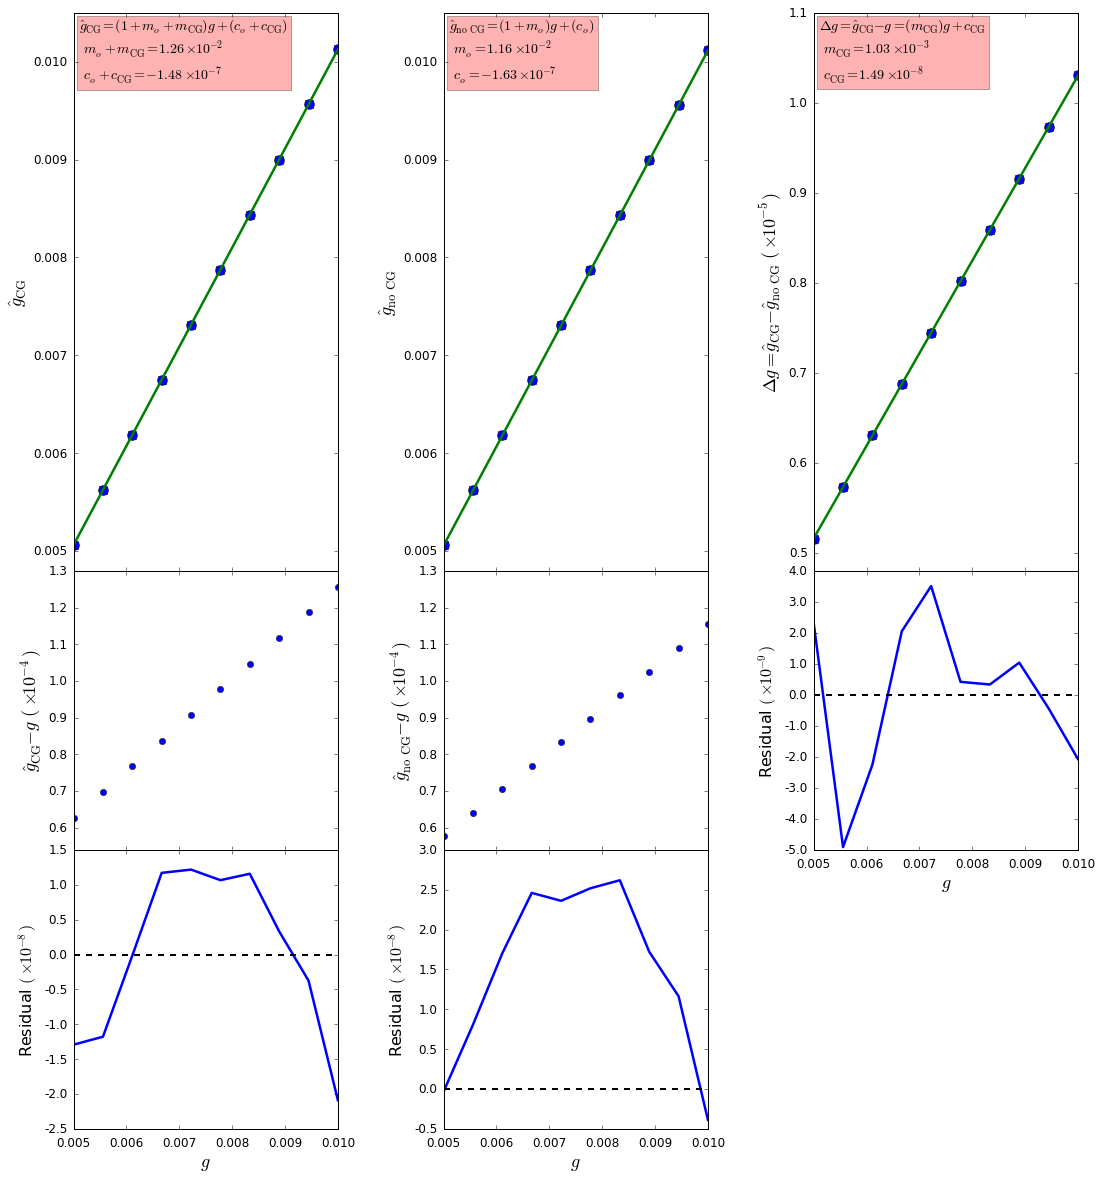

In [8]:
# Parametric
gtrue = np.linspace(0.005, 0.01, 10)
gcg = cat['para_g_cg'].T[0]
gnocg = cat['para_g_no_cg'].T[0]
plot_calibnew(gcg.T[0],gnocg.T[0],gtrue)
plt.savefig(plot_path + "ref_gal_check_def.png", 
             bbox_inches='tight')

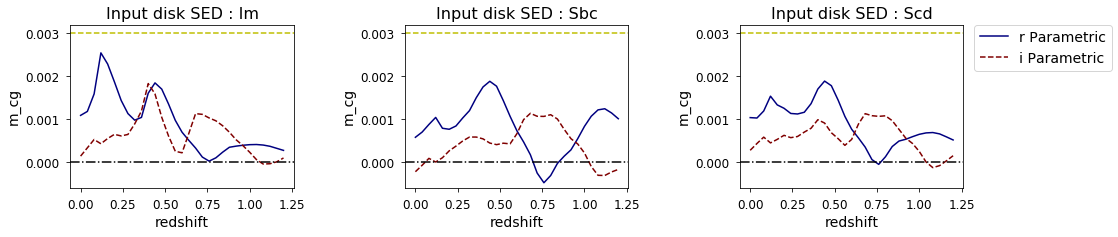

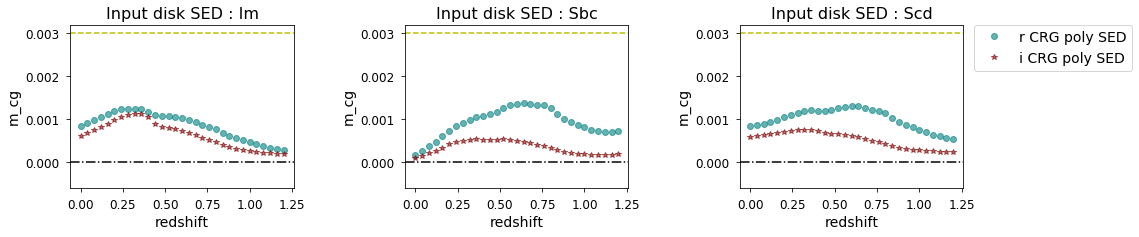

In [4]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir +'/results/ref_gal_cg_bias_{0}_dsed_i_band.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['para_m1'].T[2],
             '-', label='r Parametric', color='navy')
    plt.plot(redshifts, cat2[dSED]['para_m1'].T[2],
             '--', label='i Parametric', color='maroon')
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['CRG_m1'].T[2],
             'o',label='r CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts, cat2[dSED]['CRG_m1'].T[2],
             '*',label='i CRG poly SED',color='maroon', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig(plot_path + "ref_gal_i_r.png", 
             bbox_inches='tight')







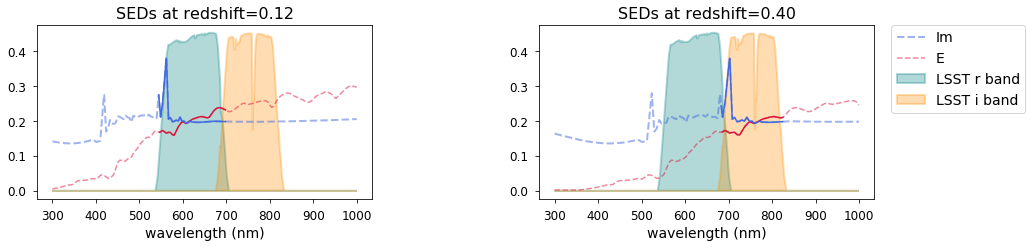

In [6]:
x=np.linspace(300,1000,1000)
disk_SED_name='Im'
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
filt_r = galsim.Bandpass( parentdir + '/data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass(parentdir + '/data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)

plt.figure(figsize=[15,8])    
plt.subplot(2,2,1)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.12)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
             c=colors[0], linestyle='--', alpha=0.5)
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E', linestyle='--', alpha=0.5)
mul_b, = np.where(in_p.b_SED(x)*filt_r(x) >0.1)
plt.plot(x[mul_b],in_p.b_SED(x)[mul_b]*0.2, c='crimson')
mul_d, = np.where(in_p.d_SED(x)*filt_r(x) >0.1)
plt.plot(x[mul_d],in_p.d_SED(x)[mul_d]*0.2,c=colors[0])
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.3, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.3, color='Darkorange', label='LSST i band',linewidth=2)


plt.subplot(2,2,2)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
         c=colors[0], linestyle='--', alpha=0.5)
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E', linestyle='--', alpha=0.5)
mul_b, = np.where(in_p.b_SED(x)*filt_i(x) >0.1)
plt.plot(x[mul_b],in_p.b_SED(x)[mul_b]*0.2, c='crimson')
mul_d, = np.where(in_p.d_SED(x)*filt_i(x) >0.1)
plt.plot(x[mul_d],in_p.d_SED(x)[mul_d]*0.2,c=colors[0])
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.3, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.3, color='Darkorange', label='LSST i band',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig(plot_path + "ref_gal_i_r_band.png", 
             bbox_inches='tight')